In [1]:
import tools
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
%matplotlib inline

## Histograms

`matplotlib` doesn't do well with overlapping histograms, as the bins don't line up by default. This function addresses that.

In [2]:
np.random.seed(42)
x1 = stats.norm(0, 1).rvs(100000)
x2 = stats.norm(3, 2).rvs(50000)
x3 = stats.norm(5, 1.5).rvs(50000)

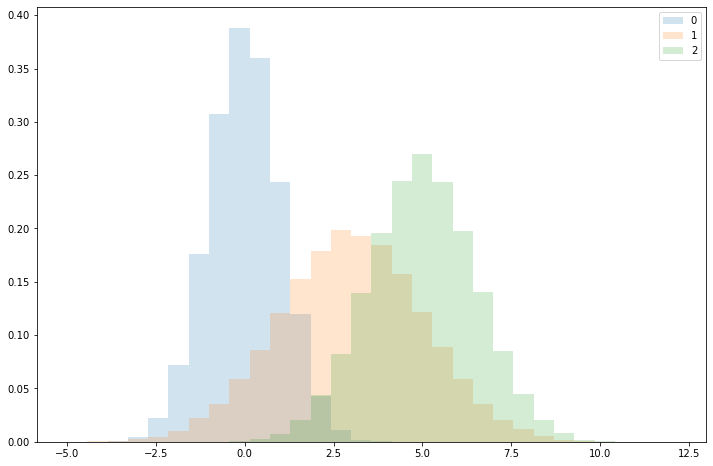

In [3]:
tools.multihist([x1, x2, x3],
                density=True,
                bins=30,
                xmin=None,
                xmax=None)
plt.savefig('images/multihist.png')

There are two main ways to call it. In the above case we pass a list of arrays, one array for each histogram. In the other approach we pass a second argument representing the label.

In [4]:
x = np.concatenate([x1, x2, x3])
y = np.array((['N(0, 1)'] * 100000 +
              ['N(3, 2)'] * 50000 +
              ['N(5, 1.5)'] * 50000))

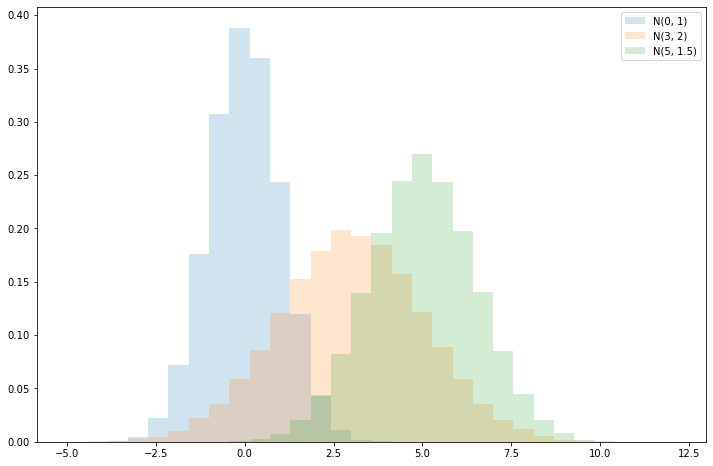

In [5]:
tools.multihist(x, y, density=True, bins=30, xmin=None, xmax=None)

It can take most of the expected arguments, including `figsize`, `color`, and `alpha`.

Setting the parameter `align=True` will force bin boundaries to line up on multiples of powers of ten times 1, 2, or 5, matching the number of `bins` as closely as possible.

## Confusion Matrices

This is a visualization of confusion matrices using the size of a sub-square to indicate the value in a box.

We're using a poor model as an example.

In [6]:
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

In [7]:
data = load_digits()
X = data.data
y = data.target

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [9]:
model = DecisionTreeClassifier(max_depth=5)
model.fit(X_train, y_train);

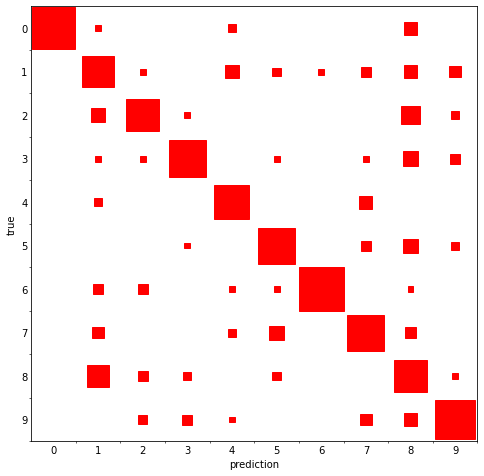

In [10]:
fig, ax = plt.subplots(figsize=(8,8))
tools.plot_confusion_matrix(ax,
                            y_test, model.predict(X_test),
                            shape='square',
                            area=True, grid=False,
                            color='r', transpose=True)
plt.savefig('images/confusion.png')

The confusion matrix has three different options for how to normalize the size of the squares. In the default (`normalization='maximum'`), the size of each square is proportional to the number of samples among all the possible combinations, scaled so that the square corresponding to the largest number fills an entire space in the grid.

For `'precision'` or `'prediction`', the numbers are scaled separately within each predicted label (column by default), so the total sizes of all the squares for a single prediction would fill a grid space. In this case, the size of the square (relative to the grid space) represents the precision for that combination.

For `'recall'` or `'true`', the numbers are scaled separately within each true label (row by default), so total sizes of all the squares for a single true value would fill a grid space. In this case, the size of the square (relative to the grid space) represents the recall for that combination.

In [11]:
y_true = [0, 0, 0, 0, 1, 1, 1, 1, 1, 2, 2, 2]
y_pred = [0, 0, 0, 1, 1, 1, 1, 0, 0, 2, 1, 0]

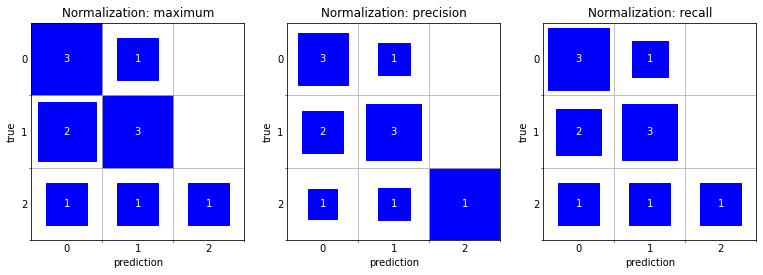

In [12]:
fig, axs = plt.subplots(1, 3, figsize=(13, 4))

for ax, normalization in zip(axs, ['maximum','precision', 'recall']):
    tools.plot_confusion_matrix(ax, y_true, y_pred,
                                grid=True,
                                counts=True,
                                normalization=normalization,
                                transpose=True) 
    ax.set_title(f"Normalization: {normalization}")

By default the confusion matrices have the predictions along the horizontal axis and the true values along the vertical (transposed from the `sklearn` standard). That can be switched with `transpose=False`.

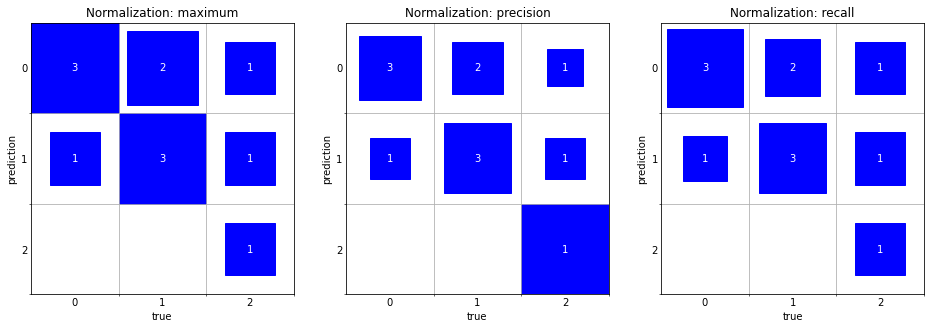

In [13]:
fig, axs = plt.subplots(1, 3, figsize=(16, 5))

for ax, normalization in zip(axs, ['maximum','precision', 'recall']):
    tools.plot_confusion_matrix(ax, y_true, y_pred,
                                grid=True,
                                counts=True,
                                normalization=normalization,
                                transpose=False) 
    ax.set_title(f"Normalization: {normalization}")


## Diagonal lines

`matplotlib` has functions for vertical and horizontal lines that don't affect the existing limits (`axvline` and `axhline`), but drawing a diagonal lines requires some work in checking these first. The `axdline` function takes care of that.

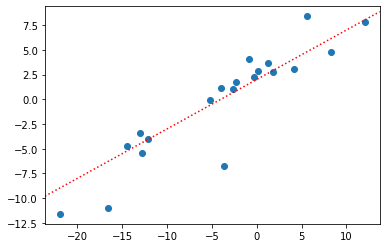

In [14]:
x = stats.norm(-5, 10).rvs(20)
y = 2 + 0.5 * x + stats.norm(0, 3).rvs(20)

fig, ax = plt.subplots()
ax.scatter(x, y)
tools.axdline(ax, 0.5, 2, c='red', ls=':')

## CDFs of discrete random variables

Drawing CDFs is often done by plotting the CDF of closely separated points. This is good for continuous random variables, but is less satisfying for the discrete case, showing the discontinuities as not-quite-perfect steps.

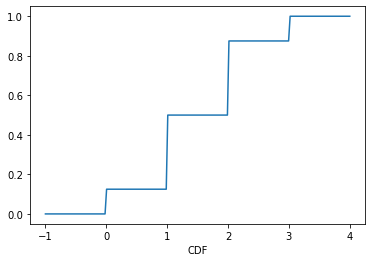

In [15]:
fig, ax = plt.subplots()
xs = np.linspace(-1, 4, 200)
dist = stats.binom(3, 0.5)
ax.plot(xs, dist.cdf(xs))
ax.set_xlabel('CDF');

The `plot_discrete_cdf` function generates a more precise drawing.

It takes (in addition to the axis) a dictionary of PMFs, as well as an (optional) fractional margin to be added past the minimum and maximum points.

Future versions will be more flexible.

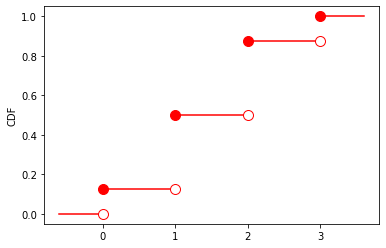

In [16]:
fig, ax = plt.subplots()
tools.plot_discrete_cdf(ax,
                        {x: dist.pmf(x) for x in (0, 1, 2, 3)},
                        color='r')

## Scatter Matrices of Principal Components

One way to display high-dimensional data is to calculate plot the first principal component against the second. Although that expresses the largest components of the variation, substantial information is encoded in the other principal components. This functions plots the first few principal components against each other in a scatter matrix.

This visualization is a reimplementation of work done in my dissertation  (Bennetto, J. (1998) *Computational Tight-Binding Studies of Dislocations and Dielectric Properties of Semiconductors* \[Unpublished doctoral dissertation\]. Rutgers University.) in which I used in to display the paths in configuration space of defects moving through crystals.

This example uses the iris data set, so doesn't show the full power of the technique.

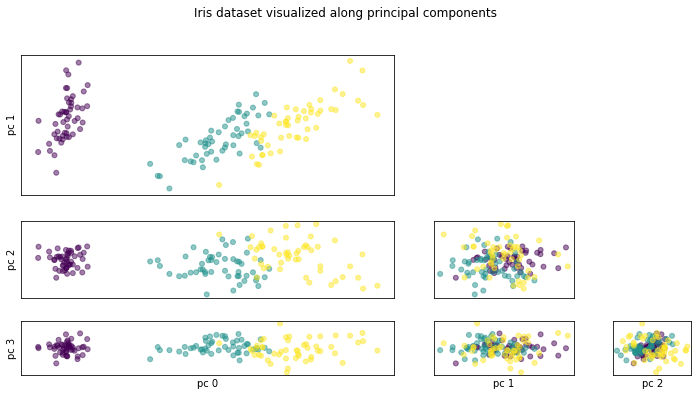

In [17]:
from sklearn.datasets import load_iris
data = load_iris()

fig = tools.pca_scatter_matrix(data.data,
                               n_components=4,
                               color=data.target,
                               alpha=0.5,
                               s=25,
                               figsize=(12, 6))
fig.suptitle("Iris dataset visualized along principal components");